In [1]:
import pandas as pd
#import pandas as pd
import numpy as np
#import seaborn as sns
from matplotlib import pyplot as plt
#import plotly.graph_objects as go
#from fbprophet import Prophet
import pycountry

In [2]:
df = pd.read_csv('time_series_19-covid-Recovered.csv')
df.drop(columns=['Sno'],inplace=True)


In [3]:
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,Kerala,1,0,0,0
1,31/01/20,Kerala,1,0,0,0
2,01/02/20,Kerala,2,0,0,0
3,02/02/20,Kerala,3,0,0,0
4,03/02/20,Kerala,3,0,0,0


In [4]:
df.describe()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
count,293.000000,293.000000,293.000000,293.000000
mean,6.204778,1.365188,0.638225,0.109215
std,9.389172,3.596957,1.530122,0.323218
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,7.000000,1.000000,0.000000,0.000000
max,64.000000,14.000000,9.000000,2.000000


In [5]:
df=df.groupby(['State/UnionTerritory',"Date"]).head()
States=np.unique(df['State/UnionTerritory'].values)
States

array(['Andhra Pradesh', 'Bihar', 'Chandigarh', 'Chattisgarh',
       'Chhattisgarh', 'Delhi', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Odisha', 'Pondicherry',
       'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana',
       'Union Territory of Chandigarh',
       'Union Territory of Jammu and Kashmir',
       'Union Territory of Ladakh', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [6]:
df[df['State/UnionTerritory'] == 'Kerala']

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,Kerala,1,0,0,0
1,31/01/20,Kerala,1,0,0,0
2,01/02/20,Kerala,2,0,0,0
3,02/02/20,Kerala,3,0,0,0
4,03/02/20,Kerala,3,0,0,0
5,04/02/20,Kerala,3,0,0,0
6,05/02/20,Kerala,3,0,0,0
7,06/02/20,Kerala,3,0,0,0
8,07/02/20,Kerala,3,0,0,0
9,08/02/20,Kerala,3,0,0,0


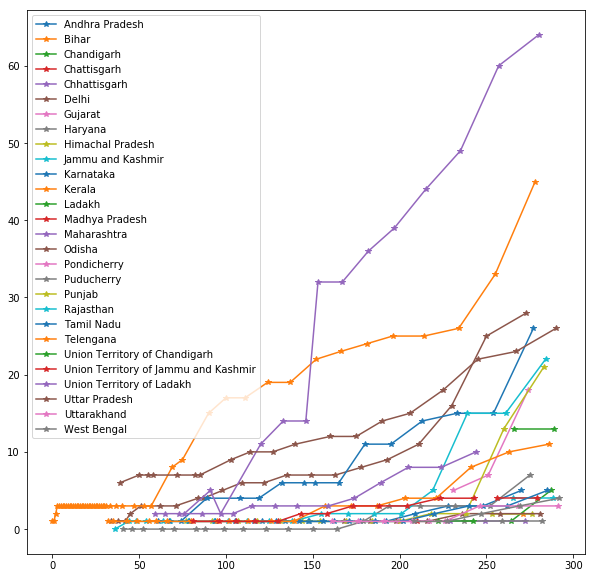

In [7]:
plt.figure(figsize=(10,10))

for state in States:
    plt.plot(df[df['State/UnionTerritory'] == state]['ConfirmedIndianNational'],"*-",label=state)
plt.legend()